# <center> CNN - Image Classification
    

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Loading the Images

In [2]:
# create a data generator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [3]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                                                                                   
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2, 
                                                           horizontal_flip=True,
                                                           validation_split = 0.02)

val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)

In [4]:
# load and iterate training dataset
train_data = train_gen.flow_from_directory('train/', target_size =(224,224), class_mode='categorical', batch_size=64)

# load and iterate validation dataset
val_data = val_gen.flow_from_directory('valid/', target_size =(224,224), class_mode='categorical', batch_size=64)

# load and iterate test dataset
test_data = test_gen.flow_from_directory('test/', target_size =(224,224), class_mode='categorical', batch_size=64)

Found 10416 images belonging to 73 classes.
Found 365 images belonging to 73 classes.
Found 365 images belonging to 73 classes.


In [5]:
# confirm the iterator works
batchX, batchy = train_data.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(64, 224, 224, 3), min=0.000, max=1.000


In [6]:
labels = list(train_data.class_indices.keys())

len(labels)

73

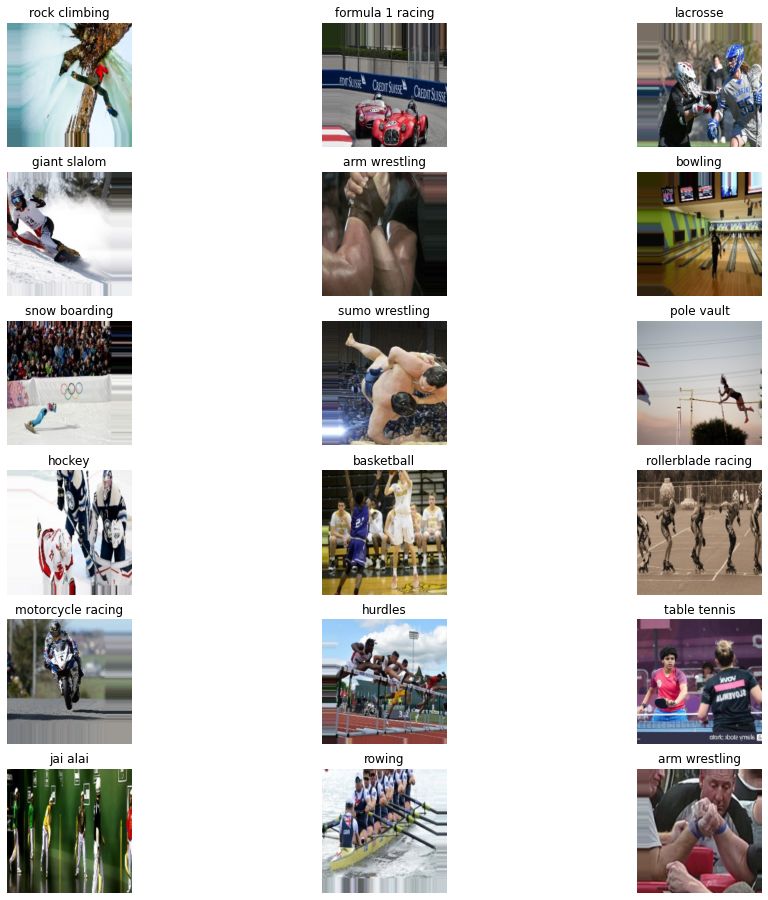

In [7]:
# visualizing the train data
plt.figure(figsize=(16,16))

for i in range(18):
  image,label = train_data.next()

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(labels[tf.argmax(label[i])])
  plt.axis("off")

## Task 2: Configure the CNN model

In [8]:
model = tf.keras.Sequential([
                             layers.Conv2D(filters= 64, kernel_size = 2, activation= "relu", input_shape = (224,224,3)),
                             layers.MaxPooling2D(pool_size= 2),

                             layers.Conv2D(filters= 64, kernel_size= 2, activation= "relu"),
                             layers.Conv2D(filters= 64, kernel_size= 2, activation= "relu"),
                             layers.MaxPooling2D(pool_size = 2),

                             layers.Flatten(),

                             layers.Dense(128, activation="relu"),
                             layers.Dense(73, activation="softmax")

])

## Task 3: Train the CNN model for Epoch (take E=25) 

In [9]:
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [14]:
# fitting data to the model

model.fit(train_data,
          epochs = 1,
          steps_per_epoch = len(train_data),
          validation_data = val_data,
          validation_steps = len(val_data)
          )

163/163 [==============================] - 847s 5s/step - loss: 3.9898 - accuracy: 0.0671 - val_loss: 3.5138 - val_accuracy: 0.1233


In [15]:
# fitting data to the model

model1 = model.fit(train_data,
          epochs = 25,
          steps_per_epoch = len(train_data),
          validation_data = val_data,
          validation_steps = len(val_data)
          )

Epoch 1/25
163/163 [==============================] - 768s 5s/step - loss: 3.2904 - accuracy: 0.1688 - val_loss: 3.1893 - val_accuracy: 0.2055
Epoch 2/25
163/163 [==============================] - 763s 5s/step - loss: 2.9898 - accuracy: 0.2328 - val_loss: 2.9339 - val_accuracy: 0.2685
Epoch 3/25
163/163 [==============================] - 772s 5s/step - loss: 2.7832 - accuracy: 0.2737 - val_loss: 2.6106 - val_accuracy: 0.3370
Epoch 4/25
163/163 [==============================] - 763s 5s/step - loss: 2.6012 - accuracy: 0.3167 - val_loss: 2.2978 - val_accuracy: 0.3836
Epoch 5/25
163/163 [==============================] - 1017s 6s/step - loss: 2.4884 - accuracy: 0.3431 - val_loss: 2.2136 - val_accuracy: 0.3863
Epoch 6/25
163/163 [==============================] - 764s 5s/step - loss: 2.3686 - accuracy: 0.3665 - val_loss: 2.3085 - val_accuracy: 0.4000
Epoch 7/25
163/163 [==============================] - 792s 5s/step - loss: 2.2957 - accuracy: 0.3838 - val_loss: 1.9477 - val_accuracy: 0.465

In [10]:
## Plotting training and validation loss
loss = model1.model1['loss']
val_loss = model1.model1['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Plotting training and validation accuracy
acc = model1.model1['acc']
val_acc = model1.model1['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

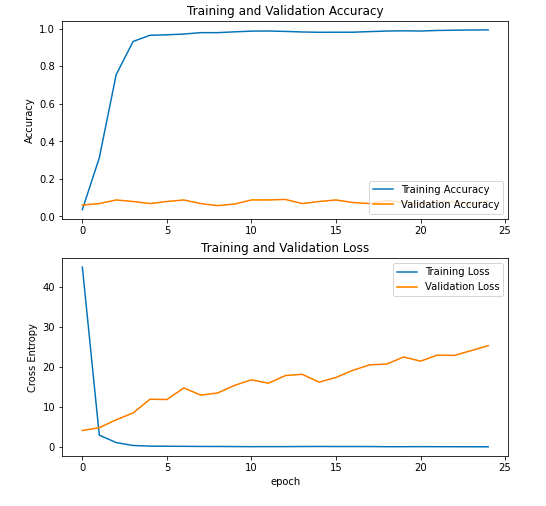

## Task 4: Evaluate the trained CNN model on test data.  

In [21]:
model_evaluation = model.evaluate(test_data)

6/6 [==============================] - 8s 1s/step - loss: 1.5566 - accuracy: 0.5836


In [22]:
print(f"Model Accuracy: {model_evaluation[1] * 100 :0.2f} %")

Model Accuracy: 58.36 %


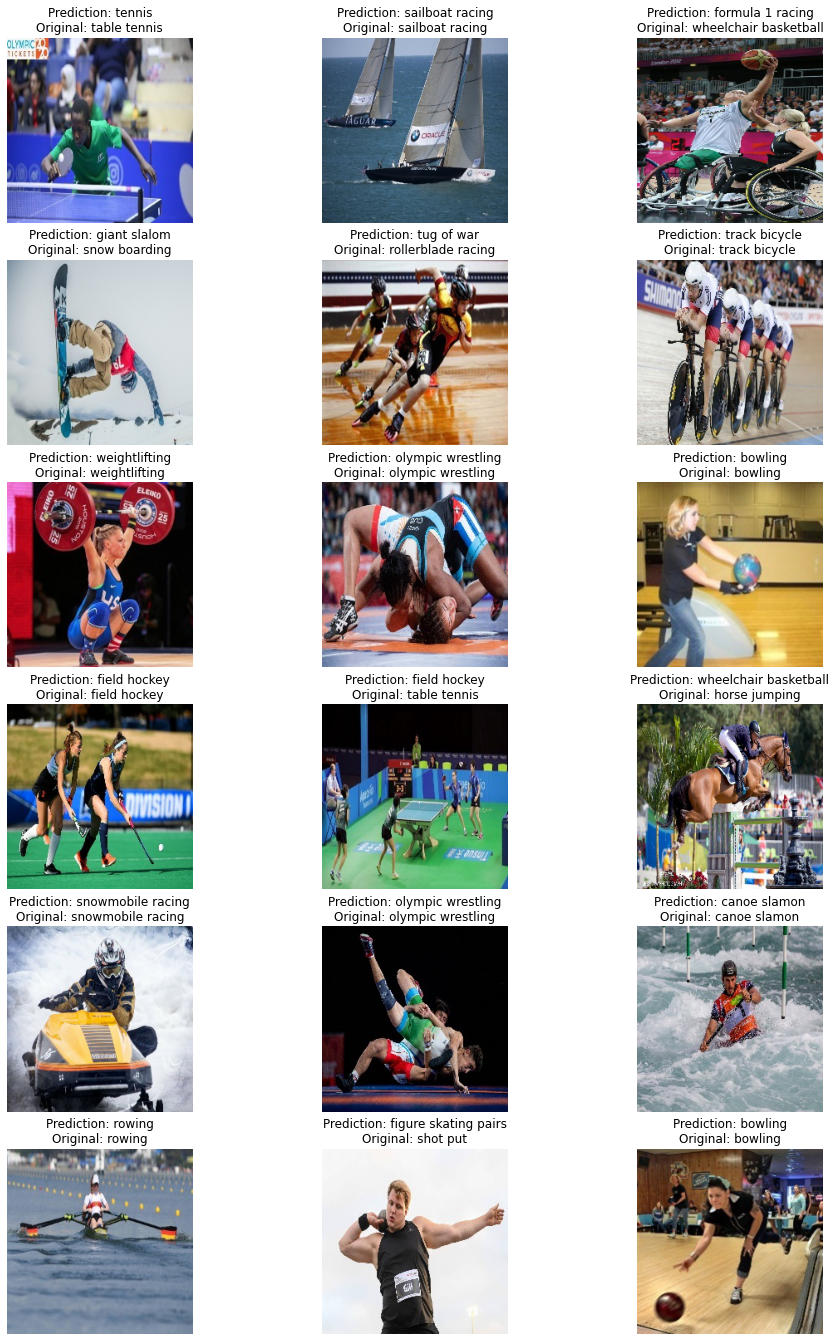

In [23]:
# predicting and visualizing the test data

plt.figure(figsize=(16,16))

for i in range(18):
  image,label = test_data.next()
  model_pred = model.predict(image)

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction: {labels[tf.argmax(model_pred[i])]}\nOriginal: {labels[tf.argmax(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")

### Classification Report 

In [12]:
Y_prediction = model.predict(test_data)

In [13]:
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction, axis = 1) 

In [ ]:
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_data,axis = 1) 

In [ ]:
# Classification Report

from sklearn.metrics import classification_report 

print(classification_report(test_data, train_data))

## Task 5: Tunning the model

Change the number of hidden units<br>
Increase the number of hidden layers<br>
Use a different optimizer<br>
Train for more epochs for better graphs<br>
Try using CIFAR dataset<br>

### By using the above measures we can tune the model to get more accuracy